#Project Dissertation (CI7000_A_SPAN1_21)

## Implementaion of recommendation system for various datasets

* MovieLens 1M Dataset
---


*    Ladan Saeidi - K2145352


# Installing Required Libraries

In [1]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 8.5 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633969 sha256=0ae884f76f17401d7f70d4824de2333fb6a0b3b621f1d23afb75dde8644cd0e9
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


# Importing Required Libraries

In [6]:
from surprise import SVD, KNNBasic, KNNBaseline, NMF, CoClustering, SlopeOne, NormalPredictor, KNNWithMeans
from surprise import Dataset
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Importing Data

In [3]:
# Load the movielens-1M dataset
data = Dataset.load_builtin('ml-1m')


Dataset ml-1m could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-1m.zip...
Done! Dataset ml-1m has been saved to /root/.surprise_data/ml-1m


In [4]:
df = pd.DataFrame(data.__dict__['raw_ratings'], columns=['user_id','item_id','rating','timestamp'])
df.drop(columns=['timestamp'],inplace=True)
df.rename({'user_id':'userId','item_id':'movieId'},axis=1,inplace=True)
df

,userId,movieId,rating
0,1,1193,5.0
1,1,661,3.0
2,1,914,3.0
3,1,3408,4.0
4,1,2355,5.0
...,...,...,...
1000204,6040,1091,1.0
1000205,6040,1094,5.0
1000206,6040,562,5.0
1000207,6040,1096,4.0


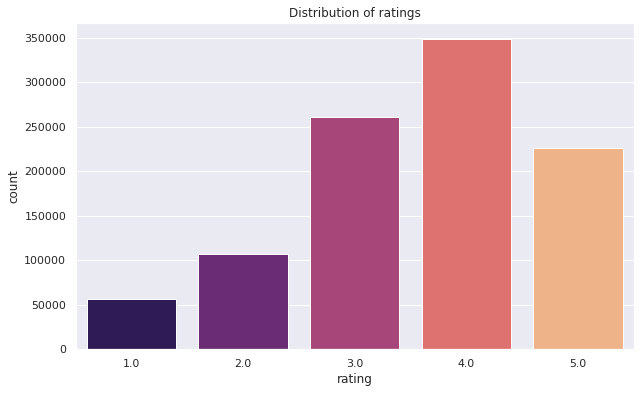

In [7]:
sns.set(rc={'figure.figsize':(10,6)})
ax =sns.countplot(x='rating',data=df,palette="magma")
ax.set_title('Distribution of ratings');

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   userId   1000209 non-null  object 
 1   movieId  1000209 non-null  object 
 2   rating   1000209 non-null  float64
dtypes: float64(1), object(2)
memory usage: 22.9+ MB


In [10]:
df['userId'].value_counts().nunique()

743

In [35]:
dist_of_rate = (df['rating'] == 4).value_counts()
dist_of_rate

False    651238
True     348971
Name: rating, dtype: int64

# Implementing Algorithms

## SVD

In [ ]:
# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8732  0.8745  0.8720  0.8728  0.8749  0.8735  0.0011  
MAE (testset)     0.6860  0.6862  0.6841  0.6855  0.6876  0.6859  0.0011  
Fit time          51.19   49.88   49.61   50.14   53.68   50.90   1.49    
Test time         2.88    3.00    2.51    3.21    2.58    2.84    0.26    


{'test_rmse': array([0.87322996, 0.87447429, 0.87197299, 0.87281718, 0.87489249]),
 'test_mae': array([0.68604143, 0.68622205, 0.68407174, 0.68547686, 0.68756482]),
 'fit_time': (51.18696928024292,
  49.879085540771484,
  49.60528087615967,
  50.13568711280823,
  53.6823673248291),
 'test_time': (2.8758327960968018,
  3.0034642219543457,
  2.513241767883301,
  3.2126963138580322,
  2.575638771057129)}

## KNNBasic (Item-base, Pearson Method)

In [ ]:
similarity_options = {
    'name': 'pearson',
    'user_based': 'False'
}

In [ ]:
# We'll use the famous KNNBasic algorithm.
algo = KNNBasic(sim_options = similarity_options)

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9617  0.9625  0.9609  0.9622  0.9633  0.9621  0.0008  
MAE (testset)     0.7659  0.7656  0.7652  0.7660  0.7670  0.7660  0.0006  
Fit time          87.76   87.63   88.53   92.57   91.22   89.54   1.99    
Test time         154.31  149.27  152.27  163.42  161.03  156.06  5.33    


{'test_rmse': array([0.96167741, 0.9624851 , 0.96092019, 0.96221244, 0.96329689]),
 'test_mae': array([0.76591988, 0.76558665, 0.76522946, 0.76599128, 0.76703622]),
 'fit_time': (87.76278114318848,
  87.62675786018372,
  88.53168225288391,
  92.56771063804626,
  91.21755337715149),
 'test_time': (154.3085834980011,
  149.27220273017883,
  152.2742576599121,
  163.4200668334961,
  161.02500796318054)}

## KNNBasic (User-base, Pearson Method)

In [ ]:
similarity_options1 = {
    'name': 'pearson',
    'user_based': 'True'
}

In [ ]:
# We'll use the famous KNNBasic algorithm.
algo = KNNBasic(sim_options = similarity_options1)

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9589  0.9614  0.9632  0.9638  0.9623  0.9619  0.0017  
MAE (testset)     0.7627  0.7652  0.7670  0.7674  0.7659  0.7656  0.0016  
Fit time          94.18   91.80   90.89   93.04   92.54   92.49   1.11    
Test time         167.05  164.24  162.01  160.96  166.80  164.21  2.46    


{'test_rmse': array([0.95892905, 0.96139959, 0.96319839, 0.96384651, 0.96226111]),
 'test_mae': array([0.76274705, 0.76520508, 0.76695104, 0.76737026, 0.76587696]),
 'fit_time': (94.17956376075745,
  91.80472254753113,
  90.88966989517212,
  93.0406563282013,
  92.54461717605591),
 'test_time': (167.04707431793213,
  164.23551416397095,
  162.0075318813324,
  160.96201920509338,
  166.79972434043884)}

## KNNBasic (User-base, msd Method)

In [ ]:
# We'll use the famous KNNBasic algorithm.
algo = KNNBasic(sim_options={'name': 'msd','user_based': 'True'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9204  0.9210  0.9263  0.9220  0.9253  0.9230  0.0024  
MAE (testset)     0.7245  0.7264  0.7301  0.7274  0.7289  0.7275  0.0019  
Fit time          49.30   50.49   50.58   51.45   51.47   50.66   0.80    
Test time         163.25  162.26  162.31  163.75  161.77  162.67  0.72    


{'test_rmse': array([0.92041852, 0.92098636, 0.92630576, 0.92195182, 0.92529057]),
 'test_mae': array([0.72454383, 0.72637246, 0.73014377, 0.72735592, 0.72890773]),
 'fit_time': (49.29800987243652,
  50.48624229431152,
  50.582526206970215,
  51.451460123062134,
  51.46891379356384),
 'test_time': (163.2455770969391,
  162.26339268684387,
  162.3134729862213,
  163.7505326271057,
  161.76937556266785)}

## KNNBasic (Item-base, Pearsmsdon Method)

In [ ]:
# We'll use the famous KNNBasic algorithm.
algo = KNNBasic(sim_options={'name': 'msd','user_based': 'False'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9230  0.9208  0.9246  0.9239  0.9220  0.9228  0.0014  
MAE (testset)     0.7280  0.7261  0.7278  0.7286  0.7269  0.7275  0.0009  
Fit time          48.76   49.93   50.20   50.90   52.89   50.53   1.37    
Test time         159.38  160.05  160.83  163.72  160.22  160.84  1.51    


{'test_rmse': array([0.92295033, 0.92075434, 0.9245847 , 0.92390369, 0.92202073]),
 'test_mae': array([0.72799089, 0.72613751, 0.72781259, 0.72855651, 0.72693393]),
 'fit_time': (48.7555468082428,
  49.927786350250244,
  50.19584894180298,
  50.89558148384094,
  52.89035367965698),
 'test_time': (159.38437485694885,
  160.05307936668396,
  160.82545924186707,
  163.71983885765076,
  160.21656823158264)}

## NMF

In [ ]:
# We'll use the famous NMF algorithm.
algo = NMF()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9182  0.9191  0.9125  0.9186  0.9164  0.9169  0.0024  
MAE (testset)     0.7259  0.7267  0.7211  0.7258  0.7240  0.7247  0.0020  
Fit time          56.08   58.83   56.62   56.74   56.23   56.90   0.99    
Test time         2.65    2.72    2.67    2.71    2.78    2.70    0.04    


{'test_rmse': array([0.91816677, 0.91908349, 0.91254886, 0.91858728, 0.91635986]),
 'test_mae': array([0.72593478, 0.72667863, 0.72106395, 0.72579316, 0.72399174]),
 'fit_time': (56.08432149887085,
  58.825088024139404,
  56.619654178619385,
  56.73918390274048,
  56.2320294380188),
 'test_time': (2.651937961578369,
  2.7176241874694824,
  2.6684539318084717,
  2.709035634994507,
  2.775334358215332)}

## KNNBaseline (User-base, msd Method)

In [ ]:
# We'll use the famous KNNBaseline algorithm.
algo = KNNBaseline(sim_options={'name': 'msd','user_based': 'True'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8938  0.8940  0.8966  0.8987  0.8930  0.8952  0.0021  
MAE (testset)     0.7056  0.7059  0.7074  0.7094  0.7050  0.7066  0.0016  
Fit time          56.65   57.76   60.03   57.75   59.57   58.35   1.26    
Test time         168.33  171.12  166.71  167.72  165.99  167.98  1.77    


{'test_rmse': array([0.89381596, 0.89399668, 0.8966373 , 0.89870999, 0.89295255]),
 'test_mae': array([0.70556699, 0.70593352, 0.70735626, 0.70936976, 0.70498171]),
 'fit_time': (56.65305209159851,
  57.756606101989746,
  60.02940511703491,
  57.75499510765076,
  59.57086539268494),
 'test_time': (168.32807993888855,
  171.12498569488525,
  166.7101652622223,
  167.72176146507263,
  165.99295568466187)}

## KNNBaseline (Item-base, msd Method)

In [ ]:
# We'll use the famous KNNBaseline algorithm.
algo = KNNBaseline(sim_options={'name': 'msd','user_based': 'False'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8925  0.8956  0.8958  0.8954  0.8954  0.8949  0.0012  
MAE (testset)     0.7052  0.7073  0.7063  0.7067  0.7063  0.7064  0.0007  
Fit time          58.08   58.34   58.47   58.71   58.24   58.37   0.21    
Test time         166.43  166.36  165.18  166.51  166.48  166.19  0.51    


{'test_rmse': array([0.89247616, 0.89559406, 0.89575796, 0.89538105, 0.89539781]),
 'test_mae': array([0.70521504, 0.70733922, 0.70629936, 0.70674282, 0.70629108]),
 'fit_time': (58.07991075515747,
  58.34290647506714,
  58.4745454788208,
  58.71129512786865,
  58.24362325668335),
 'test_time': (166.43483924865723,
  166.35590934753418,
  165.1769733428955,
  166.50571656227112,
  166.47600030899048)}

## KNNBaseline (Item-base, Pearson Method)

In [ ]:
# We'll use the famous KNNBaseline algorithm.
algo = KNNBaseline(sim_options={'name': 'Pearson','user_based': 'False'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8965  0.8954  0.8978  0.8952  0.8925  0.8955  0.0018  
MAE (testset)     0.7073  0.7060  0.7079  0.7056  0.7038  0.7061  0.0014  
Fit time          99.34   99.52   98.91   104.41  97.53   99.94   2.34    
Test time         164.82  163.25  163.87  164.84  163.42  164.04  0.67    


{'test_rmse': array([0.89654435, 0.89542761, 0.89781279, 0.89521492, 0.8924877 ]),
 'test_mae': array([0.70726778, 0.70598143, 0.70790189, 0.70558012, 0.70378993]),
 'fit_time': (99.33945727348328,
  99.52449417114258,
  98.90596795082092,
  104.40711688995361,
  97.53220319747925),
 'test_time': (164.81991124153137,
  163.25256752967834,
  163.87101912498474,
  164.83692002296448,
  163.4195749759674)}

## KNNBaseline (User-base, Pearson Method)

In [ ]:
# We'll use the famous KNNBaseline algorithm.
algo = KNNBaseline(sim_options={'name': 'Pearson','user_based': 'True'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8974  0.8945  0.8967  0.8965  0.8932  0.8957  0.0016  
MAE (testset)     0.7072  0.7055  0.7069  0.7069  0.7042  0.7061  0.0011  
Fit time          96.76   101.00  100.17  99.95   99.27   99.43   1.45    
Test time         165.11  166.78  166.81  166.00  163.75  165.69  1.15    


{'test_rmse': array([0.8973792 , 0.89450798, 0.8967157 , 0.89654044, 0.89319914]),
 'test_mae': array([0.70717295, 0.70547587, 0.70689156, 0.70692169, 0.70420461]),
 'fit_time': (96.75776195526123,
  101.00242018699646,
  100.16861844062805,
  99.946120262146,
  99.27243161201477),
 'test_time': (165.11017036437988,
  166.77700185775757,
  166.80656790733337,
  165.99520826339722,
  163.75175881385803)}

## KNNWithMeans (User-base, msd Method)

In [ ]:
# We'll use the famous KNNWithMeans algorithm.
algo = KNNWithMeans(sim_options={'name': 'msd','user_based': 'True'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9303  0.9312  0.9278  0.9298  0.9267  0.9292  0.0016  
MAE (testset)     0.7396  0.7403  0.7373  0.7388  0.7365  0.7385  0.0014  
Fit time          49.27   51.94   51.77   52.51   52.12   51.52   1.15    
Test time         160.54  163.68  165.26  161.95  163.52  162.99  1.61    


{'test_rmse': array([0.93025624, 0.93118594, 0.92780134, 0.92981558, 0.92673204]),
 'test_mae': array([0.7395965 , 0.74025232, 0.73730321, 0.73877352, 0.73654522]),
 'fit_time': (49.26954627037048,
  51.93835234642029,
  51.772505044937134,
  52.511704444885254,
  52.118019580841064),
 'test_time': (160.53934907913208,
  163.67851376533508,
  165.26081681251526,
  161.9529252052307,
  163.5208225250244)}

## KNNWithMeans (Item-base, msd Method)

In [ ]:
# We'll use the famous KNNWithMeans algorithm.
algo = KNNWithMeans(sim_options={'name': 'msd','user_based': 'False'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9314  0.9279  0.9303  0.9283  0.9295  0.9295  0.0013  
MAE (testset)     0.7395  0.7383  0.7398  0.7378  0.7390  0.7389  0.0007  
Fit time          49.71   51.23   51.93   52.94   51.92   51.55   1.07    
Test time         162.47  164.59  165.66  159.66  158.68  162.21  2.71    


{'test_rmse': array([0.93140365, 0.92794012, 0.93025852, 0.92826572, 0.92954415]),
 'test_mae': array([0.73948292, 0.7382826 , 0.73978462, 0.73781662, 0.73896631]),
 'fit_time': (49.705239057540894,
  51.23240780830383,
  51.93067240715027,
  52.93833518028259,
  51.920527935028076),
 'test_time': (162.46550917625427,
  164.5866665840149,
  165.66353845596313,
  159.65513563156128,
  158.68203568458557)}

## KNNWithMeans (Item-base, Pearson Method)

In [ ]:
# We'll use the famous KNNWithMeans algorithm.
algo = KNNWithMeans(sim_options={'name': 'Pearson','user_based': 'False'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9185  0.9179  0.9193  0.9183  0.9177  0.9183  0.0006  
MAE (testset)     0.7232  0.7228  0.7241  0.7241  0.7228  0.7234  0.0006  
Fit time          93.39   92.67   95.33   93.17   94.25   93.76   0.94    
Test time         159.35  161.13  161.59  160.17  159.33  160.32  0.92    


{'test_rmse': array([0.91847265, 0.91793071, 0.91933224, 0.91825412, 0.91768186]),
 'test_mae': array([0.72315593, 0.72281906, 0.72405133, 0.72405618, 0.72276727]),
 'fit_time': (93.38889360427856,
  92.66830158233643,
  95.33134078979492,
  93.16709089279175,
  94.25099492073059),
 'test_time': (159.3532145023346,
  161.12970900535583,
  161.59314465522766,
  160.17461514472961,
  159.32842636108398)}

## KNNWithMeans (User-base, Pearson Method)

In [ ]:
# We'll use the famous KNNWithMeans algorithm.
algo = KNNWithMeans(sim_options={'name': 'Pearson','user_based': 'True'})

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9174  0.9165  0.9208  0.9161  0.9205  0.9183  0.0020  
MAE (testset)     0.7221  0.7226  0.7246  0.7213  0.7253  0.7232  0.0015  
Fit time          93.77   92.58   96.30   96.33   92.47   94.29   1.71    
Test time         157.66  157.62  158.71  163.03  162.15  159.83  2.30    


{'test_rmse': array([0.91740536, 0.91649448, 0.92082954, 0.91609102, 0.92048953]),
 'test_mae': array([0.72214689, 0.72255945, 0.72458916, 0.72132944, 0.72531347]),
 'fit_time': (93.77304577827454,
  92.57516503334045,
  96.296138048172,
  96.32876396179199,
  92.46908736228943),
 'test_time': (157.66446161270142,
  157.61719036102295,
  158.70915412902832,
  163.0292637348175,
  162.14922404289246)}

## CoClustering

In [ ]:
# We'll use the famous CoClustering algorithm.
algo = CoClustering()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm CoClustering on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9142  0.9125  0.9197  0.9137  0.9139  0.9148  0.0025  
MAE (testset)     0.7162  0.7159  0.7206  0.7158  0.7167  0.7170  0.0018  
Fit time          27.78   27.56   26.69   28.37   27.21   27.52   0.56    
Test time         2.23    2.41    2.41    2.14    2.39    2.32    0.11    


{'test_rmse': array([0.9141735 , 0.91254423, 0.91969881, 0.91369731, 0.91394847]),
 'test_mae': array([0.71619615, 0.71587629, 0.72057034, 0.71581965, 0.71673249]),
 'fit_time': (27.77727508544922,
  27.564953327178955,
  26.694661378860474,
  28.368786573410034,
  27.20563817024231),
 'test_time': (2.2302932739257812,
  2.4054508209228516,
  2.4147181510925293,
  2.1376848220825195,
  2.3931467533111572)}

In [ ]:
# We'll use the famous CoClustering algorithm.
algo = CoClustering(n_cltr_u=3,n_cltr_i=3,n_epochs=20)

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm CoClustering on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9151  0.9155  0.9186  0.9200  0.9159  0.9170  0.0019  
MAE (testset)     0.7166  0.7182  0.7204  0.7213  0.7184  0.7190  0.0017  
Fit time          26.85   27.75   27.52   28.72   27.77   27.72   0.60    
Test time         2.40    3.44    2.11    2.46    2.43    2.57    0.46    


{'test_rmse': array([0.91509963, 0.91548578, 0.91855807, 0.92000495, 0.91589376]),
 'test_mae': array([0.71664678, 0.71815592, 0.72036112, 0.72130114, 0.71835301]),
 'fit_time': (26.851858615875244,
  27.74881935119629,
  27.52345609664917,
  28.724937438964844,
  27.773369550704956),
 'test_time': (2.3954877853393555,
  3.4433469772338867,
  2.1106817722320557,
  2.4570906162261963,
  2.428729295730591)}

## NormalPredictor

In [ ]:
# We'll use the famous NormalPredictor algorithm.
algo = NormalPredictor()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5024  1.5055  1.5076  1.5069  1.5081  1.5061  0.0021  
MAE (testset)     1.2046  1.2060  1.2096  1.2083  1.2101  1.2077  0.0021  
Fit time          1.29    1.99    2.02    1.99    1.93    1.84    0.28    
Test time         2.72    2.72    2.45    2.63    2.66    2.64    0.10    


{'test_rmse': array([1.50239746, 1.50552858, 1.50763486, 1.50694978, 1.50812735]),
 'test_mae': array([1.20461321, 1.20602091, 1.20960812, 1.2083273 , 1.21005033]),
 'fit_time': (1.289999008178711,
  1.9870736598968506,
  2.016174793243408,
  1.9899590015411377,
  1.9341366291046143),
 'test_time': (2.718033790588379,
  2.718461751937866,
  2.448504686355591,
  2.630082130432129,
  2.662818431854248)}

## SlopeOne

In [ ]:
# We'll use the famous SlopeOne algorithm.
algo = SlopeOne()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9068  0.9039  0.9073  0.9062  0.9085  0.9065  0.0015  
MAE (testset)     0.7149  0.7123  0.7152  0.7146  0.7153  0.7145  0.0011  
Fit time          15.97   16.58   16.81   16.73   17.49   16.72   0.49    
Test time         58.93   57.63   59.28   58.43   58.31   58.51   0.56    


{'test_rmse': array([0.90677755, 0.90394506, 0.90725335, 0.90619896, 0.90847062]),
 'test_mae': array([0.71490434, 0.71225351, 0.71523718, 0.71458562, 0.71534456]),
 'fit_time': (15.972025871276855,
  16.576064109802246,
  16.80592656135559,
  16.732423543930054,
  17.491035223007202),
 'test_time': (58.9254994392395,
  57.630330085754395,
  59.28223991394043,
  58.42514729499817,
  58.309160470962524)}

# Plotting RMSE

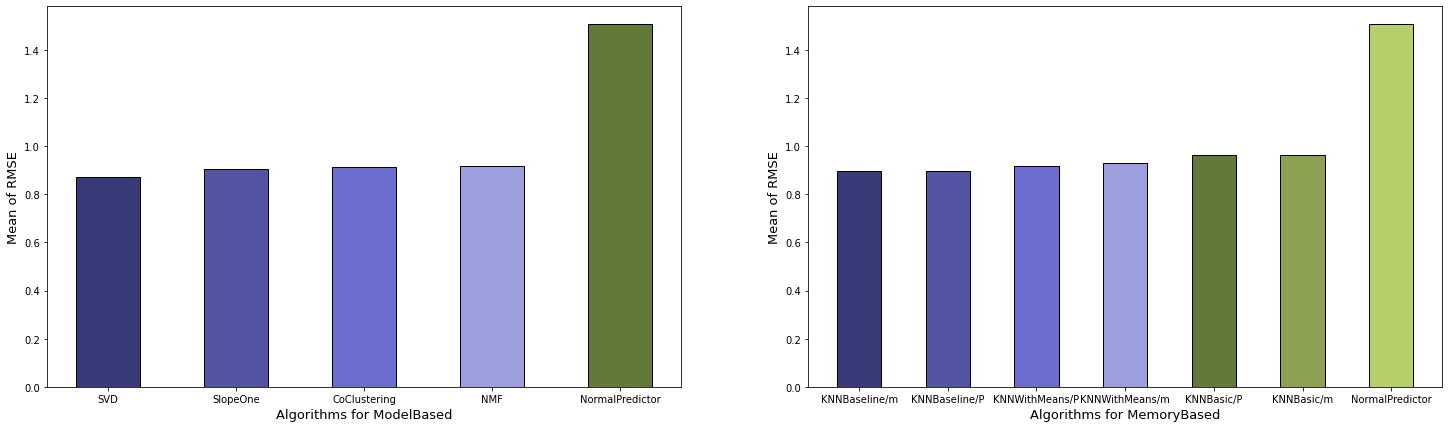

In [ ]:
algs1 = ['SVD', 'CoClustering', 'SlopeOne', 'NMF', 'NormalPredictor']
meanOfrmse1 = [0.8735,0.9148,0.9065,0.9169,1.5061]
# create Pandas dataframe from two lists
df1 = pd.DataFrame({"Algorithms":algs1,
                  "RMSE":meanOfrmse1})


algs2 = ['KNNBasic/P', 'KNNBasic/m', 'KNNBaseline/P', 'KNNBaseline/m', 'KNNWithMeans/P', 'KNNWithMeans/m', 'NormalPredictor']
meanOfrmse2 = [0.9619,0.9628, 0.8955, 0.8949, 0.9183, 0.9292, 1.5061]
# create Pandas dataframe from two lists
df2 = pd.DataFrame({"Algorithms":algs2,
                  "RMSE":meanOfrmse2})

	
df1_sorted= df1.sort_values('RMSE')
df2_sorted= df2.sort_values('RMSE')


plt.figure(figsize=(25,7))
col_map = plt.get_cmap('tab20b')



plt.subplot(121)
plt.bar('Algorithms', 'RMSE', data=df1_sorted,  width=0.5,color=col_map.colors, edgecolor='k')  
# df1_sorted['RMSE'].plot(kind='line', marker='o', color='black', ms=10)
plt.xlabel('Algorithms for ModelBased', fontsize=13)
plt.ylabel('Mean of RMSE', fontsize=13)
plt.subplot(122)
plt.bar('Algorithms', 'RMSE',  data=df2_sorted ,color=col_map.colors, edgecolor='k', width=0.5)
# df2_sorted['RMSE'].plot(kind='line', marker='o', color='black', ms=10)
plt.xlabel('Algorithms for MemoryBased', fontsize=13)
plt.ylabel('Mean of RMSE', fontsize=13)
plt.show()


# Plotting MAE

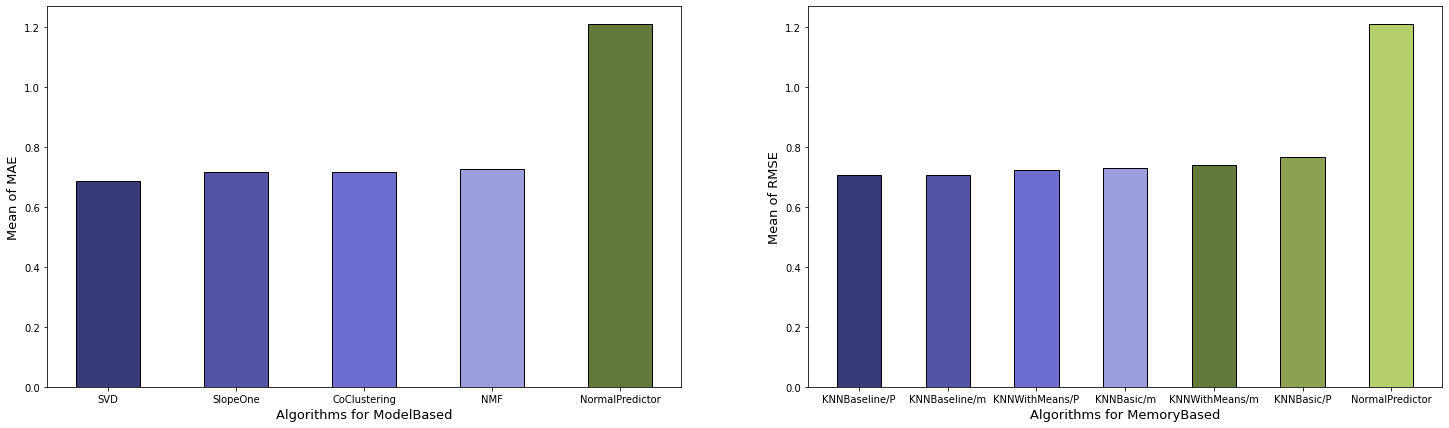

In [ ]:
algs1 = ['SVD', 'CoClustering', 'SlopeOne', 'NMF', 'NormalPredictor']
meanOfmae1 = [0.6859,0.7170,0.7145,0.7242,1.2077]
# create Pandas dataframe from two lists
df1 = pd.DataFrame({"Algorithms":algs1,
                  "MAE":meanOfmae1})


algs2 = ['KNNBasic/P', 'KNNBasic/m', 'KNNBaseline/P', 'KNNBaseline/m', 'KNNWithMeans/P', 'KNNWithMeans/m', 'NormalPredictor']
meanOfmae2 = [0.7656,0.7275, 0.7061, 0.7064, 0.7232, 0.7385, 1.2077]
# create Pandas dataframe from two lists
df2 = pd.DataFrame({"Algorithms":algs2,
                  "MAE":meanOfmae2})

	
df1_sorted= df1.sort_values('MAE')
df2_sorted= df2.sort_values('MAE')


plt.figure(figsize=(25,7))
col_map = plt.get_cmap('tab20b')



plt.subplot(121)
plt.bar('Algorithms', 'MAE', data=df1_sorted,  width=0.5,color=col_map.colors, edgecolor='k')  
# df1_sorted['MAE'].plot(kind='line', marker='o', color='black', ms=10)
plt.xlabel('Algorithms for ModelBased', fontsize=13)
plt.ylabel('Mean of MAE', fontsize=13)
plt.subplot(122)
plt.bar('Algorithms', 'MAE',  data=df2_sorted ,color=col_map.colors, edgecolor='k', width=0.5)
# df2_sorted['MAE'].plot(kind='line', marker='o', color='black', ms=10)
plt.xlabel('Algorithms for MemoryBased', fontsize=13)
plt.ylabel('Mean of RMSE', fontsize=13)
plt.show()


# Plotting RMSE and MAE on Multiple Bar Chart

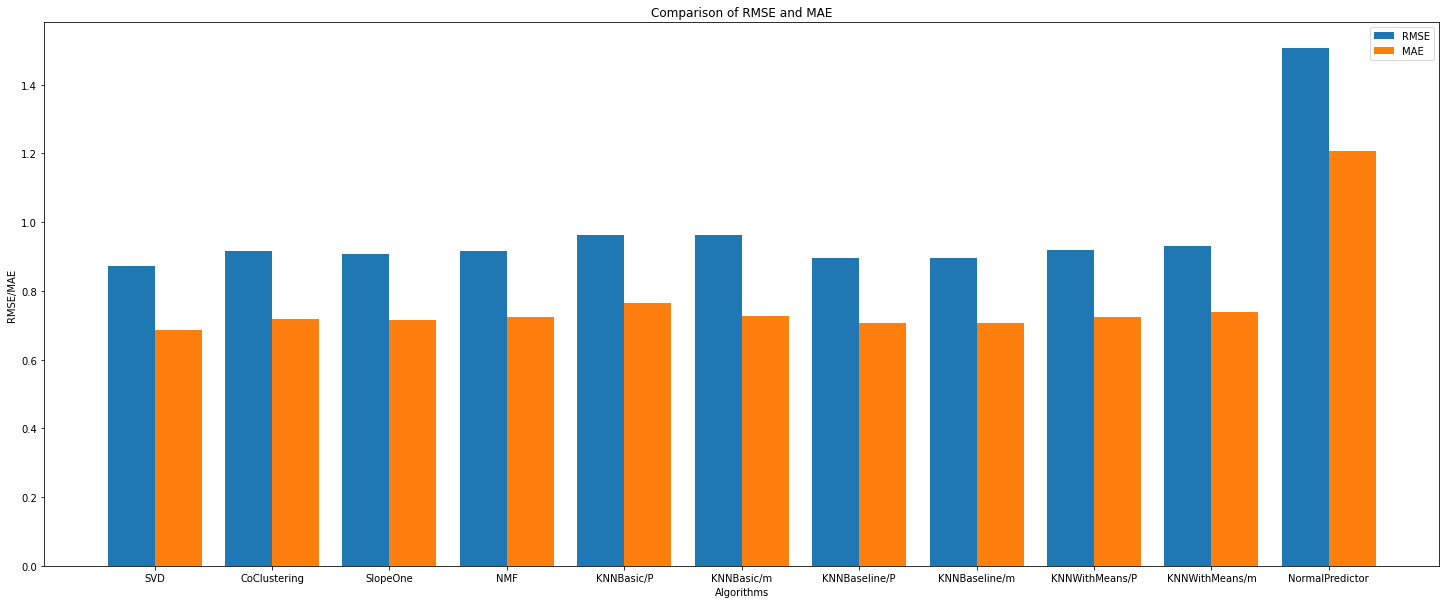

In [ ]:
X = ['SVD', 'CoClustering', 'SlopeOne', 'NMF','KNNBasic/P', 'KNNBasic/m', 'KNNBaseline/P', 'KNNBaseline/m', 'KNNWithMeans/P', 'KNNWithMeans/m', 'NormalPredictor']
rmse = [0.8735,0.9148,0.9065,0.9169,0.9619,0.9628, 0.8955, 0.8949, 0.9183, 0.9292 ,1.5061	]
mae = [0.6859,0.7170,0.7145,0.7242,0.7656,0.7275, 0.7061, 0.7064, 0.7232, 0.7385 ,1.2077]
plt.figure(figsize=[25, 10])
X_axis = np.arange(len(X))

# df1 = pd.DataFrame({"Algorithms":X,
#                   "RMSE":rmse})
# df2 = pd.DataFrame({"Algorithms":X,
#                   "MAE":mae})

# df1_sorted= df1.sort_values('RMSE')
# df2_sorted= df2.sort_values('MAE')

plt.bar(X_axis - 0.2, rmse, 0.4, label = 'RMSE')
plt.bar(X_axis + 0.2, mae, 0.4, label = 'MAE')

# plt.bar(np.arange(len(rmse)), rmse, width=0.4, data=df1_sorted)
# plt.bar(np.arange(len(mae))+ 0.4, mae, width=0.4, data=df2_sorted)


plt.xticks(X_axis, X)
plt.xlabel("Algorithms",fontsize=10)
plt.ylabel("RMSE/MAE",fontsize=10)
plt.title("Comparison of RMSE and MAE")
plt.legend()
plt.show()

# Plotting Fit_time VS Test_Time

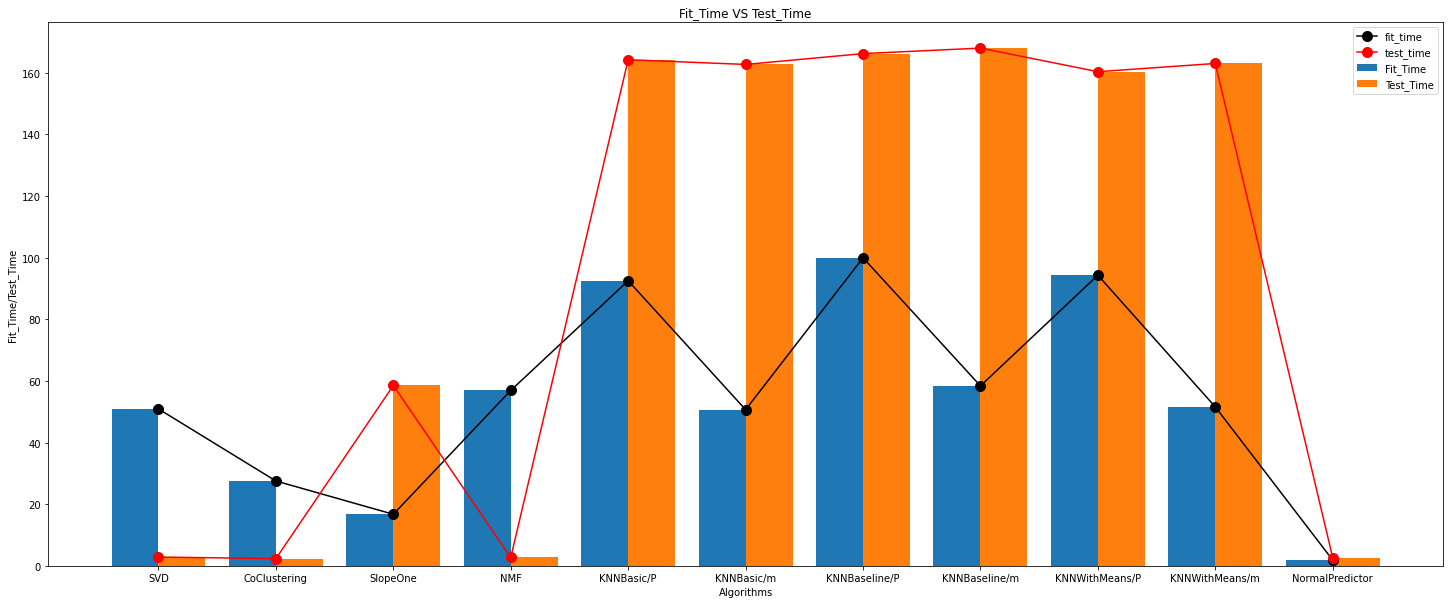

In [ ]:
X = ['SVD', 'CoClustering', 'SlopeOne', 'NMF','KNNBasic/P', 'KNNBasic/m', 'KNNBaseline/P', 'KNNBaseline/m', 'KNNWithMeans/P', 'KNNWithMeans/m', 'NormalPredictor']
fit_time = [ 50.90,27.52, 16.72, 56.90, 92.49,  50.66, 99.94,58.37,94.29, 51.55, 1.84 	]
test_time = [2.84,2.32,58.51,2.70,164.21,162.67,166.19,167.98,160.32,162.99,2.64]
plt.figure(figsize=[25, 10])
X_axis = np.arange(len(X))

df1 = pd.DataFrame({"Algorithms":X,
                  "fit_time":fit_time})
df2 = pd.DataFrame({"Algorithms":X,
                  "test_time":test_time})

# df1_sorted= df1.sort_values('RMSE')
# df2_sorted= df2.sort_values('MAE')

plt.bar(X_axis - 0.2, fit_time, 0.4, label = 'Fit_Time')
plt.bar(X_axis + 0.2, test_time, 0.4, label = 'Test_Time')
df1['fit_time'].plot(kind='line', marker='o', color='black', ms=10)
df2['test_time'].plot(kind='line', marker='o', color='red', ms=10)
# plt.bar(np.arange(len(rmse)), rmse, width=0.4, data=df1_sorted)
# plt.bar(np.arange(len(mae))+ 0.4, mae, width=0.4, data=df2_sorted)


plt.xticks(X_axis, X)
plt.xlabel("Algorithms",fontsize=10)
plt.ylabel("Fit_Time/Test_Time",fontsize=10)
plt.title("Fit_Time VS Test_Time")
plt.legend()
plt.show()

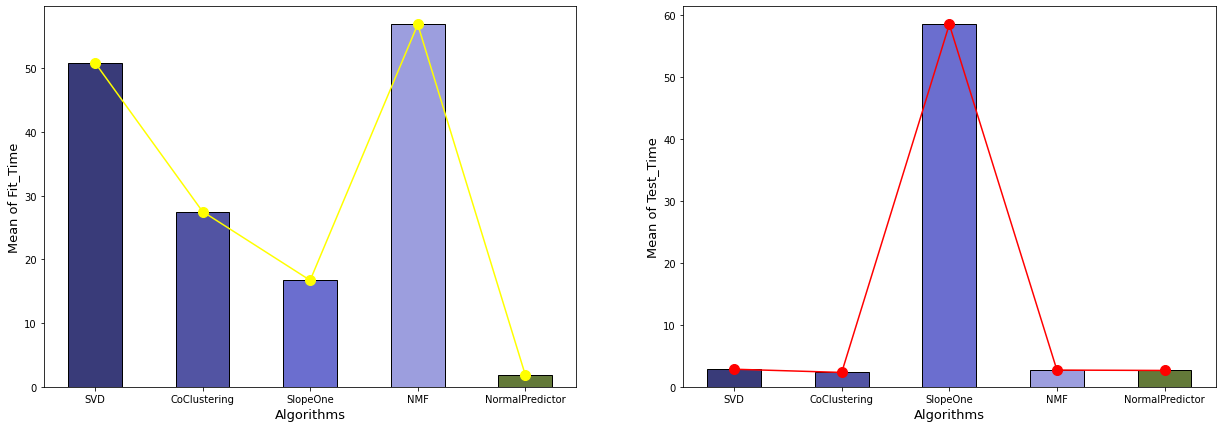

In [ ]:
algs1 = ['SVD', 'CoClustering', 'SlopeOne', 'NMF', 'NormalPredictor']
fit_time = [50.90,27.52, 16.72, 56.90, 1.84]
# create Pandas dataframe from two lists
df1 = pd.DataFrame({"Algorithms":algs1,
                  "fit_time":fit_time})


algs2 = ['SVD', 'CoClustering', 'SlopeOne', 'NMF', 'NormalPredictor']
test_time = [2.84,2.32,58.51,2.70, 2.64]
# create Pandas dataframe from two lists
df2 = pd.DataFrame({"Algorithms":algs2,
                  "test_time":test_time})

	
# df1_sorted= df1.sort_values('MAE')
# df2_sorted= df2.sort_values('MAE')


plt.figure(figsize=(21,7))
col_map = plt.get_cmap('tab20b')



plt.subplot(121)
plt.bar('Algorithms', 'fit_time', data=df1,  width=0.5,color=col_map.colors, edgecolor='k')  
df1['fit_time'].plot(kind='line', marker='o', color='yellow', ms=10)
plt.xlabel('Algorithms', fontsize=13)
plt.ylabel('Mean of Fit_Time', fontsize=13)
plt.subplot(122)
plt.bar('Algorithms', 'test_time',  data=df2 ,color=col_map.colors, edgecolor='k', width=0.5)
df2['test_time'].plot(kind='line', marker='o', color='red', ms=10)
plt.xlabel('Algorithms', fontsize=13)
plt.ylabel('Mean of Test_Time', fontsize=13)
plt.show()


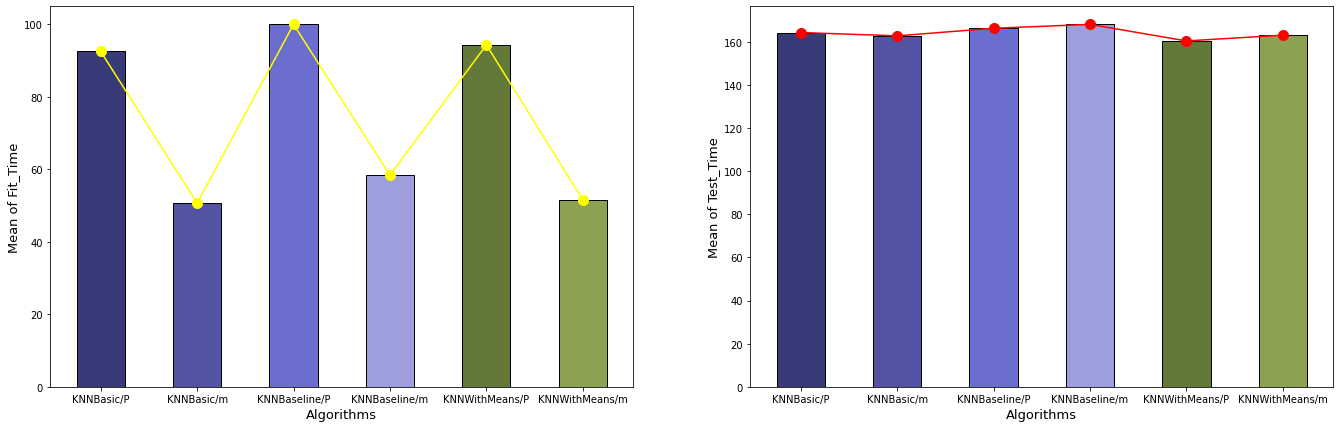

In [ ]:
algs1 = ['KNNBasic/P', 'KNNBasic/m', 'KNNBaseline/P', 'KNNBaseline/m', 'KNNWithMeans/P', 'KNNWithMeans/m']
fit_time = [92.49,  50.66, 99.94,58.37,94.29, 51.55]
# create Pandas dataframe from two lists
df1 = pd.DataFrame({"Algorithms":algs1,
                  "fit_time":fit_time})


algs2 = ['KNNBasic/P', 'KNNBasic/m', 'KNNBaseline/P', 'KNNBaseline/m', 'KNNWithMeans/P', 'KNNWithMeans/m']
test_time = [164.21,162.67,166.19,167.98,160.32,162.99]
# create Pandas dataframe from two lists
df2 = pd.DataFrame({"Algorithms":algs2,
                  "test_time":test_time})

	
# df1_sorted= df1.sort_values('MAE')
# df2_sorted= df2.sort_values('MAE')


plt.figure(figsize=(23,7))
col_map = plt.get_cmap('tab20b')



plt.subplot(121)
plt.bar('Algorithms', 'fit_time', data=df1,  width=0.5,color=col_map.colors, edgecolor='k')  
df1['fit_time'].plot(kind='line', marker='o', color='yellow', ms=10)
plt.xlabel('Algorithms', fontsize=13)
plt.ylabel('Mean of Fit_Time', fontsize=13)
plt.subplot(122)
plt.bar('Algorithms', 'test_time',  data=df2 ,color=col_map.colors, edgecolor='k', width=0.5)
df2['test_time'].plot(kind='line', marker='o', color='red', ms=10)
plt.xlabel('Algorithms', fontsize=13)
plt.ylabel('Mean of Test_Time', fontsize=13)
plt.show()


# **Working on Final Results**

#Plotting for all three datasets

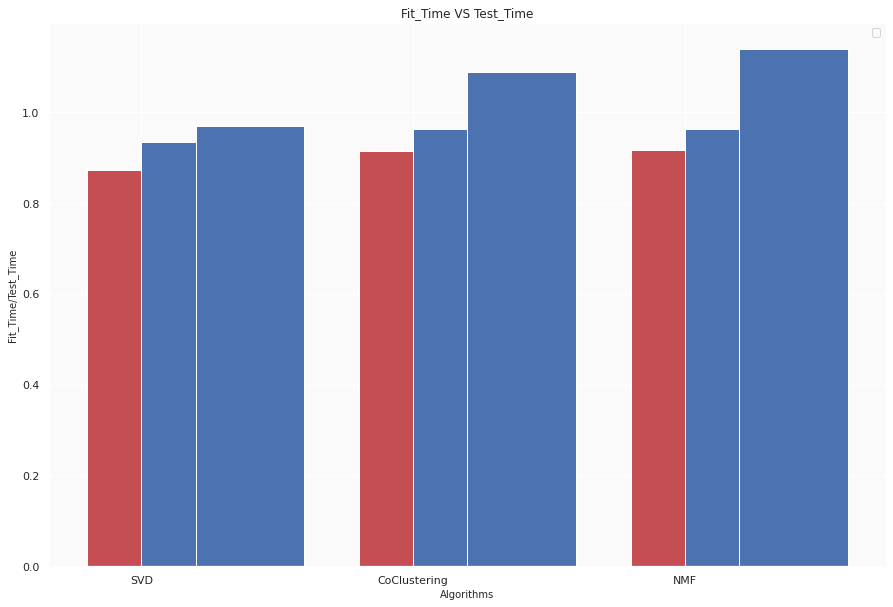

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
X = ['SVD', 'CoClustering', 'NMF']
rmse_movielens_1m = [0.8735,0.9148, 0.9169	]
rmse_movielens_100k = [0.9354,0.9623,0.9639]
rmse_netflix = [0.9707,1.0889,1.1401]
plt.figure(figsize=[15, 10])
X_axis = np.arange(len(X))

df1 = pd.DataFrame({"Algorithms":X,
                  "dataset":rmse_movielens_1m})
df2 = pd.DataFrame({"Algorithms":X,
                  "dataset":rmse_movielens_100k})
df3 = pd.DataFrame({"Algorithms":X,
                  "dataset":rmse_netflix})


plt.bar(X_axis , rmse_movielens_1m, 0.4,  color = 'r')
plt.bar(X_axis + 0.2, rmse_movielens_100k, 0.4)
plt.bar(X_axis + 0.2*2, rmse_netflix, 0.4, color = 'b' )

plt.xticks(X_axis, X)
plt.xlabel("Algorithms",fontsize=10)
plt.ylabel("Fit_Time/Test_Time",fontsize=10)
plt.title("Fit_Time VS Test_Time")
plt.legend()
plt.show()

In [ ]:
url = "https://raw.githubusercontent.com/ladan888/Project-Dissertation-CI7000_A_SPAN1_21-/main/com_res.csv"
compare_df = pd.read_csv(url).set_index('Algorithm')
compare_df

,RMSE-1M,RMSE-100K,RMSE-Netflix,MAE-1M,MAE-100K,MAE-Netflix,Fit-Time-1M,Fit-Time-100K,Fit-Time-Netflix,Test-Time-1M,Test-Time-100K,Test-Time-Netflix
Algorithm,,,,,,,,,,,,
SVD,0.8735,0.9354,0.9707,0.6859,0.7376,0.7721,50.90,4.94,83.53,2.84,0.19,2.61
SlopeOne,0.9065,0.9448,0.0000,0.7145,0.7427,0.0000,16.72,0.87,0.00,58.51,2.83,0.00
NMF,0.9169,0.9639,1.1401,0.7247,0.7578,0.9023,56.90,5.66,106.35,2.70,0.17,2.58
CoClustering,0.9148,0.9623,1.0889,0.7170,0.7529,0.8473,27.52,2.26,64.26,2.32,0.14,2.19
KNNBasic-Pearson-item-based,0.9621,1.0117,1.1284,0.7660,0.8032,0.8721,89.54,1.27,1.22,156.06,3.42,5.22
KNNBasic-Pearson-user-based,0.9619,1.0108,1.1283,0.7656,0.8028,0.8721,92.49,1.28,1.17,164.21,3.38,5.39
KNNBasic-msd-item-based,0.9228,0.9789,1.1219,0.7275,0.7734,0.8696,50.53,0.39,0.59,160.84,3.39,3.25
KNNBasic-msd-user-based,0.9230,0.9784,1.1232,0.7275,0.7723,0.8700,50.66,0.45,0.59,162.67,3.50,3.34
KNNBaseline- Pearson -item-based,0.8955,0.9312,1.0415,0.7061,0.7318,0.8014,99.94,1.69,4.72,164.04,3.91,4.01


In [ ]:
rmse = compare_df['RMSE-1M']
rmse
# rmse.iloc[0]

Algorithm
SVD                                 0.8735
SlopeOne                            0.9065
NMF                                 0.9169
CoClustering                        0.9148
KNNBasic-Pearson-item-based         0.9621
KNNBasic-Pearson-user-based         0.9619
KNNBasic-msd-item-based             0.9228
KNNBasic-msd-user-based             0.9230
KNNBaseline- Pearson -item-based    0.8955
KNNBaseline- Pearson -user-based    0.8957
KNNBaseline-msd-item-based          0.8949
KNNBaseline-msd-user-based          0.8952
KNNWithMeans-Pearson-item-based     0.9183
KNNWithMeans-Pearson-user-based     0.9183
KNNWithMeans-msd-item-based         0.9295
KNNWithMeans-msd-user-based         0.9292
NormalPredictor                     1.5061
Name: RMSE-1M, dtype: float64

In [ ]:
compare_df.corr()

,RMSE-1M,RMSE-100K,RMSE-Netflix,MAE-1M,MAE-100K,MAE-Netflix,Fit-Time-1M,Fit-Time-100K,Fit-Time-Netflix,Test-Time-1M,Test-Time-100K,Test-Time-Netflix
RMSE-1M,1.000000,0.996280,0.408004,0.999712,0.995430,0.437646,-0.483066,-0.276457,-0.158123,-0.371477,-0.404879,-0.101331
RMSE-100K,0.996280,1.000000,0.416530,0.995396,0.999735,0.446799,-0.490212,-0.242088,-0.122267,-0.401395,-0.439675,-0.099444
RMSE-Netflix,0.408004,0.416530,1.000000,0.410199,0.418048,0.998875,0.184369,0.013328,0.080297,0.068155,-0.154533,0.616857
MAE-1M,0.999712,0.995396,0.410199,1.000000,0.994926,0.439577,-0.476480,-0.281889,-0.166029,-0.360419,-0.394858,-0.087870
MAE-100K,0.995430,0.999735,0.418048,0.994926,1.000000,0.448141,-0.487270,-0.245333,-0.127668,-0.393687,-0.432627,-0.088238
MAE-Netflix,0.437646,0.446799,0.998875,0.439577,0.448141,1.000000,0.150998,0.030638,0.102847,0.027929,-0.193134,0.588101
Fit-Time-1M,-0.483066,-0.490212,0.184369,-0.476480,-0.487270,0.150998,1.000000,0.089537,-0.202804,0.648424,0.571961,0.742837
Fit-Time-100K,-0.276457,-0.242088,0.013328,-0.281889,-0.245333,0.030638,0.089537,1.000000,0.930572,-0.598279,-0.623755,-0.154021
Fit-Time-Netflix,-0.158123,-0.122267,0.080297,-0.166029,-0.127668,0.102847,-0.202804,0.930572,1.000000,-0.754384,-0.790807,-0.302634
Test-Time-1M,-0.371477,-0.401395,0.068155,-0.360419,-0.393687,0.027929,0.648424,-0.598279,-0.754384,1.000000,0.966077,0.642027


<Figure size 1080x720 with 0 Axes>

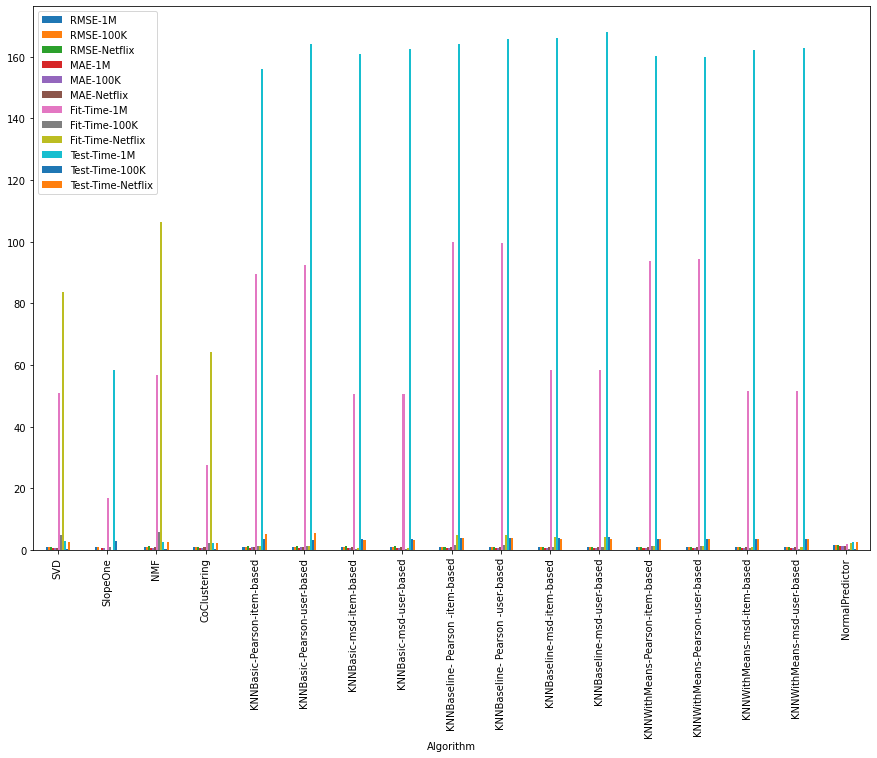

In [ ]:
import seaborn as sns
# sns.distplot(compare_df['RMSE-1M'])
# sns.distplot(compare_df['RMSE-100K'])
# sns.distplot(compare_df['RMSE-Netflix'])
plt.figure(figsize=[15, 10])
compare_df.plot.bar(figsize=(15,10))

###  Normality

To check the normality of our numerical data, we can create a a frequency histogram. This will tell us if the dataset follows a normal distribution and will inform future statistical analysis.
We will create histograms for each of our non-binary, numerical data columns.
low number of unique values. From the looks of these frequency charts, none of these datasets follow a normal distribution.

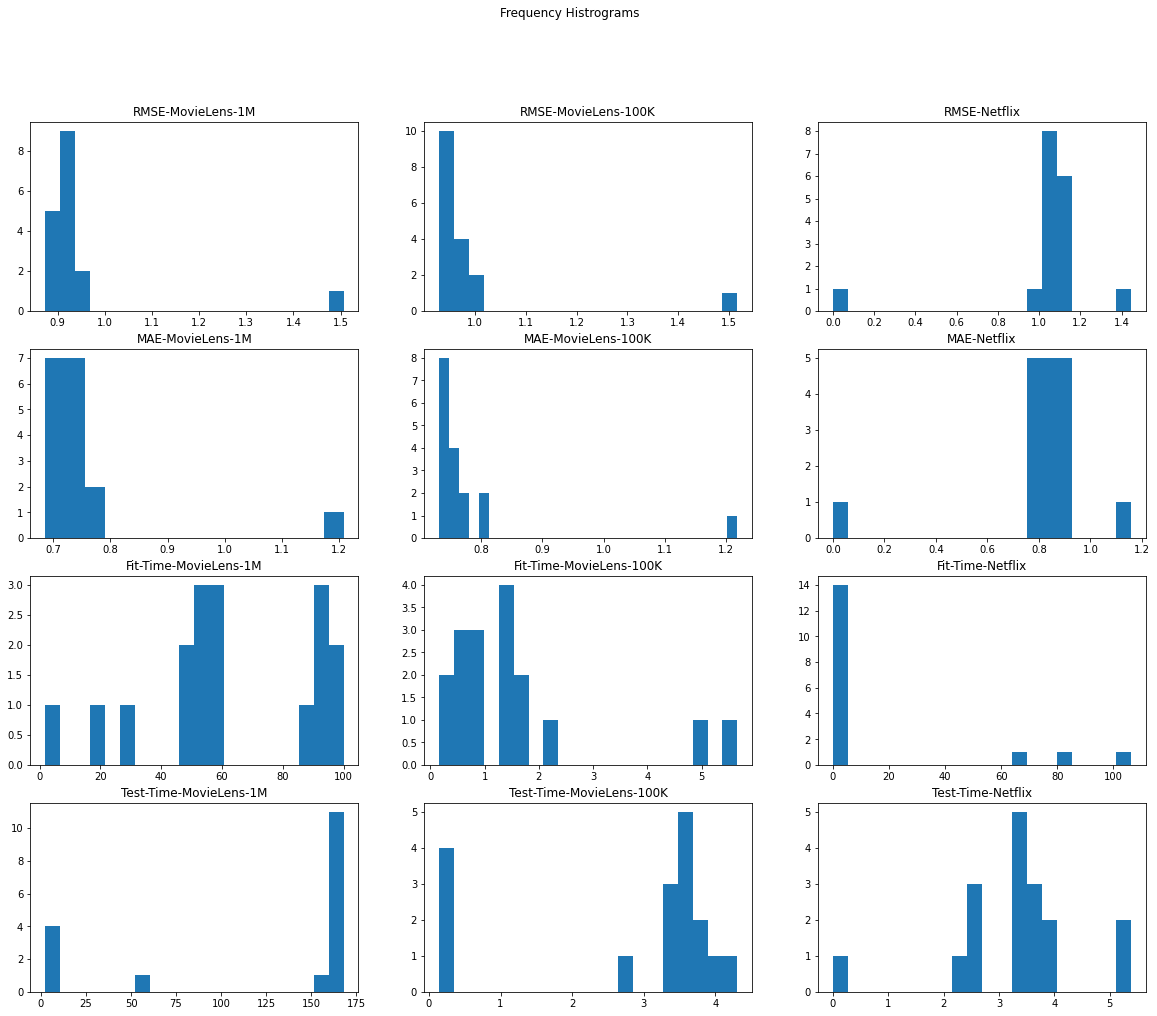

In [ ]:
# creating a histogram from frequencies of our numerical datasets

# plotting the histogram using matplotlib
norm, ((h1,h2,h3),(h4,h5,h6),(h7,h8,h9),(h10,h11,h12)) = plt.subplots(4,3,figsize=(20,16))
norm.suptitle('Frequency Histrograms')
h1.hist(compare_df['RMSE-1M'],bins=20)
h2.hist(compare_df['RMSE-100K'],bins=20)
h3.hist(compare_df['RMSE-Netflix'],bins=20)
h4.hist(compare_df['MAE-1M'],bins=15)
h5.hist(compare_df['MAE-100K'],bins=30)
h6.hist(compare_df['MAE-Netflix'],bins=20)
h7.hist(compare_df['Fit-Time-1M'],bins=20)
h8.hist(compare_df['Fit-Time-100K'],bins=20)
h9.hist(compare_df['Fit-Time-Netflix'],bins=20)
h10.hist(compare_df['Test-Time-1M'],bins=20)
h11.hist(compare_df['Test-Time-100K'],bins=20)
h12.hist(compare_df['Test-Time-Netflix'],bins=20)


# setting individual chart titles
h1.set_title('RMSE-MovieLens-1M')
h2.set_title('RMSE-MovieLens-100K')
h3.set_title('RMSE-Netflix')
h4.set_title('MAE-MovieLens-1M')
h5.set_title('MAE-MovieLens-100K')
h6.set_title('MAE-Netflix')
h7.set_title('Fit-Time-MovieLens-1M')
h8.set_title('Fit-Time-MovieLens-100K')
h9.set_title('Fit-Time-Netflix')
h10.set_title('Test-Time-MovieLens-1M')
h11.set_title('Test-Time-MovieLens-100K')
h12.set_title('Test-Time-Netflix')



plt.show()

## Plotting RMSE for All Algorithms

In [ ]:
x_h1 = ['SVD', 'SlopeOne', 'NMF', 'CoClustering','KNNBasic-Pearson-item-based',
        'NNBasic-Pearson-user-based', 'NNBasic-msd-item-based', 'NNBasic-msd-user-based',
        'KNNBaseline-Pearson-item-based', 'KNNBaseline-Pearson-user-based', 
        'KNNBaseline-msd-item-based', 'KNNBaseline-msd-user-based',
        'KNNWithMeans-Pearson-item-based', 'KNNWithMeans-Pearson-user-based',
        'KNNWithMeans-msd-item-based', 'KNNWithMeans-msd-user-basedr', 'NormalPredictor']
y_h1 = compare_df['RMSE-1M']
y_h2 = compare_df['RMSE-100K']
y_h3 = compare_df['RMSE-Netflix']


Text(0.5, 1.0, 'RMSE')

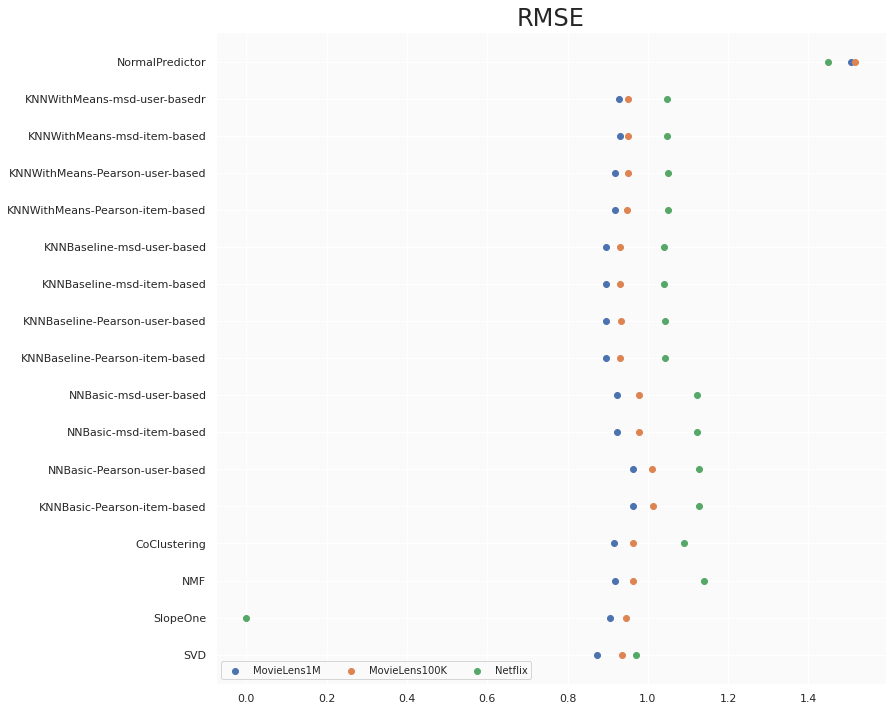

In [ ]:
# s = [2*4*n for n in range(len(x_h1))]
rm = plt.scatter(y_h1, x_h1)
rk = plt.scatter(y_h2, x_h1)
rn = plt.scatter(y_h3, x_h1)

plt.legend((rm, rk, rn),
           ('MovieLens1M', 'MovieLens100K', 'Netflix'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=10)
plt.title('RMSE',fontsize=24)

## Plotting MAE for All Algorithms

In [ ]:
y_h4 = compare_df['MAE-1M']
y_h5 = compare_df['MAE-100K']
y_h6 = compare_df['MAE-Netflix']


Text(0.5, 1.0, 'MAE')

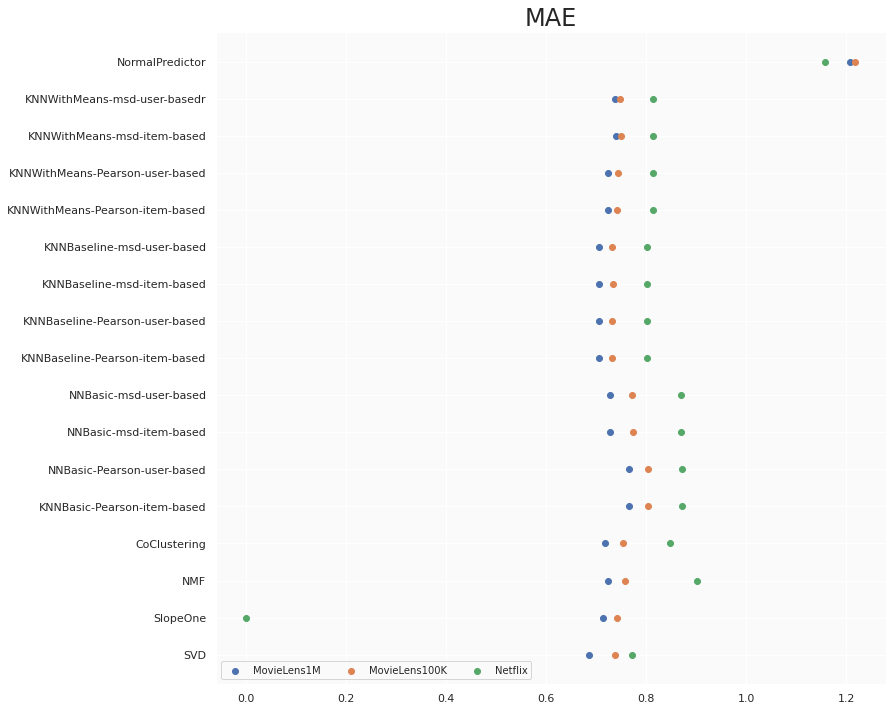

In [ ]:
# s = [2*4*n for n in range(len(x_h1))]
rm = plt.scatter(y_h4, x_h1)
rk = plt.scatter(y_h5, x_h1)
rn = plt.scatter(y_h6, x_h1)

plt.legend((rm, rk, rn),
           ('MovieLens1M', 'MovieLens100K', 'Netflix'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=10)
plt.title('MAE',fontsize=24)

## Plotting Fit_Time for All Algorithms

In [ ]:
y_h7 = compare_df['Fit-Time-1M']
y_h8 = compare_df['Fit-Time-100K']
y_h9 = compare_df['Fit-Time-Netflix']

Text(0.5, 1.0, 'Fit_Time')

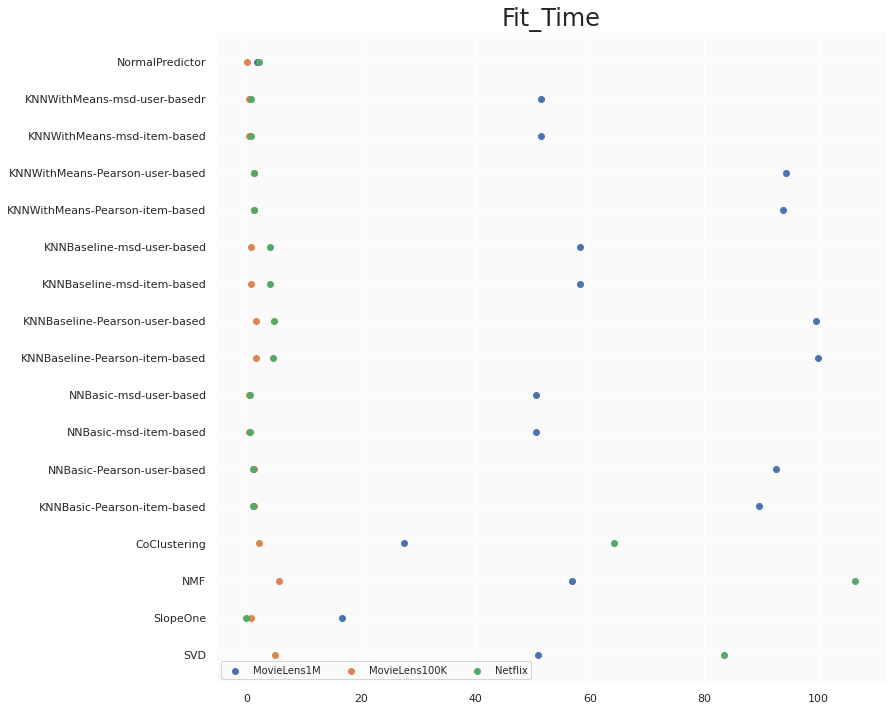

In [ ]:
# s = [2*4*n for n in range(len(x_h1))]
rm = plt.scatter(y_h7, x_h1)
rk = plt.scatter(y_h8, x_h1)
rn = plt.scatter(y_h9, x_h1)

plt.legend((rm, rk, rn),
           ('MovieLens1M', 'MovieLens100K', 'Netflix'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=10)
plt.title('Fit_Time',fontsize=24)

## Plotting Test_Time for All Algorithms

In [ ]:
y_h10 = compare_df['Test-Time-1M']
y_h11 = compare_df['Test-Time-100K']
y_h12 = compare_df['Test-Time-Netflix']

Text(0.5, 1.0, 'Test_Time')

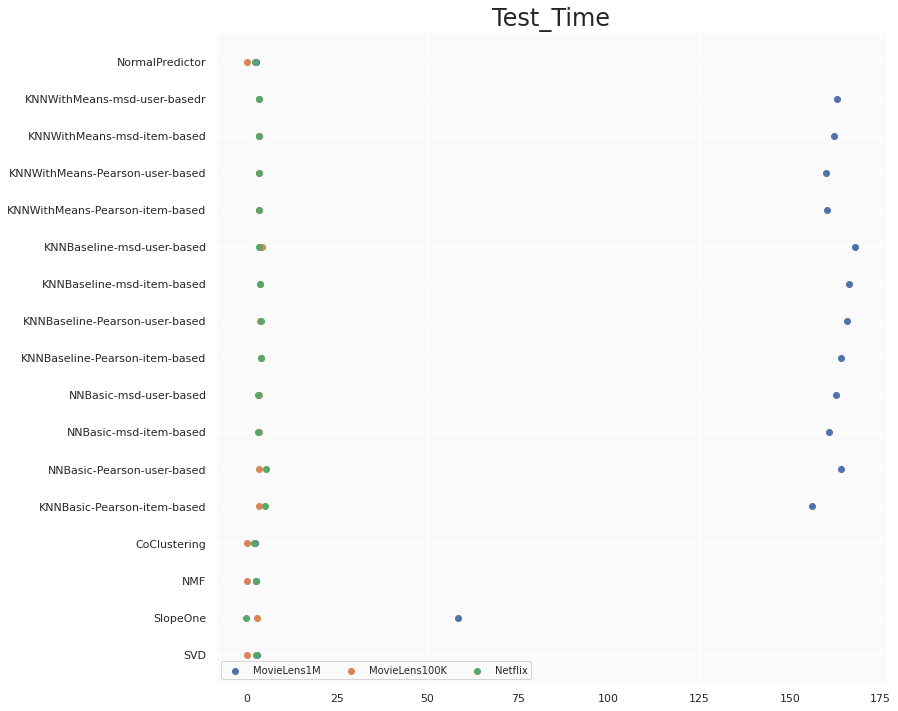

In [ ]:
# s = [2*4*n for n in range(len(x_h1))]
rm = plt.scatter(y_h10, x_h1)
rk = plt.scatter(y_h11, x_h1)
rn = plt.scatter(y_h12, x_h1)

plt.legend((rm, rk, rn),
           ('MovieLens1M', 'MovieLens100K', 'Netflix'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=10)
plt.title('Test_Time',fontsize=24)

# References
* The above code adopted from this link, and used in this implementation by making some changes. All figures' codes and results are written from scratch.

http://surpriselib.com/

https://towardsdatascience.com/building-and-testing-recommender-systems-with-surprise-step-by-step-d4ba702ef80b